<a href="https://colab.research.google.com/github/Adlina00/datavizpro/blob/main/10-deep-learning/04-pytorch-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![AnalyticsDojo](https://github.com/rpi-techfundamentals/fall2018-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Pytorch with the MNIST Dataset - MINST</h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rpi-techfundamentals/fall2018-materials/blob/master/10-deep-learning/04-pytorch-mnist.ipynb)



From Kaggle:
"MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike."

[Read more.](https://www.kaggle.com/c/digit-recognizer)


<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>

This code is adopted from the pytorch examples repository.
It is licensed under BSD 3-Clause "New" or "Revised" License.
Source: https://github.com/pytorch/examples/
LICENSE: https://github.com/pytorch/examples/blob/master/LICENSE

![](https://github.com/rpi-techfundamentals/fall2018-materials/blob/master/10-deep-learning/mnist-comparison.png?raw=1)
Table from [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

In [28]:
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.8 MB/s eta 0:00:00


### Pytorch Advantages vs Tensorflow
- Pytorch Enables dynamic computational graphs (which change be changed) while Tensorflow is static.
- Tensorflow enables easier deployment.

In [29]:
#Import Libraries


from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch.optim.lr_scheduler import StepLR


In [30]:
args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=False


In [31]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)


In [32]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=14, metavar='N',
                        help='number of epochs to train (default: 14)')
    parser.add_argument('--lr', type=float, default=1.0, metavar='LR',
                        help='learning rate (default: 1.0)')
    parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                        help='Learning rate step gamma (default: 0.7)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--no-mps', action='store_true', default=False,
                        help='disables macOS GPU training')
    parser.add_argument('--dry-run', action='store_true', default=False,
                        help='quickly check a single pass')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                        help='how many batches to wait before logging training status')
    parser.add_argument('--save-model', action='store_true', default=False,
                        help='For Saving the current Model')
    args = parser.parse_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()
    use_mps = not args.no_mps and torch.backends.mps.is_available()

    torch.manual_seed(args.seed)

    if use_cuda:
        device = torch.device("cuda")
    elif use_mps:
        device = torch.device("mps")
    else:
        device = torch.device("cpu")

    train_kwargs = {'batch_size': args.batch_size}
    test_kwargs = {'batch_size': args.test_batch_size}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

In [33]:
#Early stoppinng callback

class EarlyStopping(object):
  """
  Early stopping callback to stop training if validation loss doesn't improve for a certain number of epochs.
  """

  def __init__(self, mode='min', patience=10):
    self.patience = patience
    self.best_score = None
    self.mode = mode
    self.num_bad_epochs = 0

  def __call__(self, val_loss):
    #check loss improved based on the mode (min/max)
    if self.best_score is None or (self.mode == 'min' and val_loss < self.best_score) or (self.mode == 'max' and val_loss > self.best_score):
      self.best_score - val_loss
      self.num_bad_epochs = 0
    else:
      self.num_bad_epochs += 1

    #stop training if val_loss does not improve for patience epochs
    return self.num_bad.epochs >= self.patience

In [37]:


class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()  #Dropout
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        #Convolutional Layer/Pooling Layer/Activation
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        #Convolutional Layer/Dropout/Pooling Layer/Activation
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        #Fully Connected Layer/Activation
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        #Fully Connected Layer/Activation
        x = self.fc2(x)
        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


In [41]:

train_loss =[]
val_loss = []

def train():
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable.
        data, target = torch.Tensor(data), torch.Tensor(target)
        #This will zero out the gradients for this batch.
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = F.nll_loss(output, target)
        #dloss/dx for every Variable
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically.
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        train_loss.append(loss.item())

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
          if args['cuda']:
              data, target = data.cuda(), target.cuda()
          data, target = Variable(data, volatile=True), Variable(target)
          output = model(data)
          test_loss += F.nll_loss(output, target, reduction="sum").item() # sum up batch loss
          pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
          correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    val_loss.append(test_loss)




In [42]:
mmodel = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train()
    test()


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.391913
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.358581
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.382429
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.392477
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.393872
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.393581


<ipython-input-41-044aa3d2a3ca>:34: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 0.1517, Accuracy: 9541/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.375957
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.342915
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.334739
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.420020
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.375647
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.366064

Test set: Average loss: 0.1459, Accuracy: 9557/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.338354
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.392751
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.345890
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.371559
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.336064
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.381715

Test set: Average loss: 0.1430, Accuracy: 9573/10000 (96%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.326005
Train Epoch: 4 [10000/60000 (17%)]	Loss: 0.367146
Train Epoch: 4 [20000/60000 (33%)]	Loss: 0.378250
Train Epoch: 4 [30000/60000 (50%)]	Loss: 0.335376
Train Epoch: 4 [40000/60000 (67%

In [43]:
import matplotlib.pyplot as plt

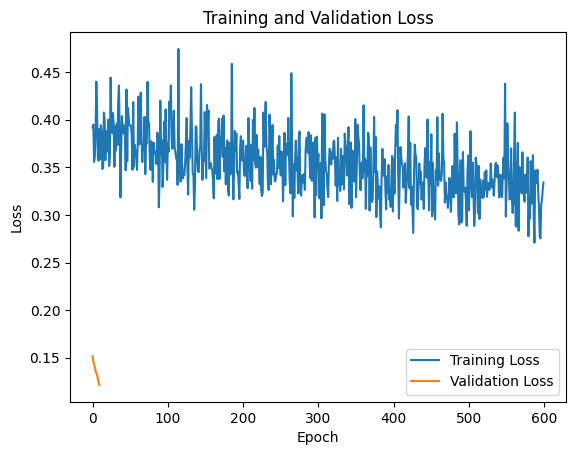

In [44]:
plt.plot(train_loss, label='Training Loss')
if len(val_loss) > 0:
  plt.plot(val_loss, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()